<a href="https://colab.research.google.com/github/giuliovv/ANNDL_competition_1/blob/master/competition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

colab = "True" #@param ['True','False']
if colab == "True":
  from google.colab import drive
  drive.mount('/gdrive')
  if not os.path.isdir('training'):
    %cd /gdrive/MyDrive/Colab Notebooks
    !unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/Tomato/37979.jpg  
  inflating: training/Tomato/37980.jpg  
  inflating: training/Tomato/37982.jpg  
  inflating: training/Tomato/37983.jpg  
  inflating: training/Tomato/37984.jpg  
  inflating: training/Tomato/37985.jpg  
  inflating: training/Tomato/37988.jpg  
  inflating: training/Tomato/37989.jpg  
  inflating: training/Tomato/37990.jpg  
  inflating: training/Tomato/37992.jpg  
  inflating: training/Tomato/37993.jpg  
  inflating: training/Tomato/37994.jpg  
  inflating: training/Tomato/37995.jpg  
  inflating: training/Tomato/37996.jpg  
  inflating: training/Tomato/37997.jpg  
  inflating: training/Tomato/37998.jpg  
  inflating: training/Tomato/37999.jpg  
  inflating: training/Tomato/38000.jpg  
  inflating: training/Tomato/38001.jpg  
  inflating: training/Tomato/38003.jpg  
  inflating: training/Tomato/38004.jpg  
  inflating: training/Tomato/38005.jpg  
  inflating: training/Tomato/38006.jpg  
  infl

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
dataset_dir = 'training'

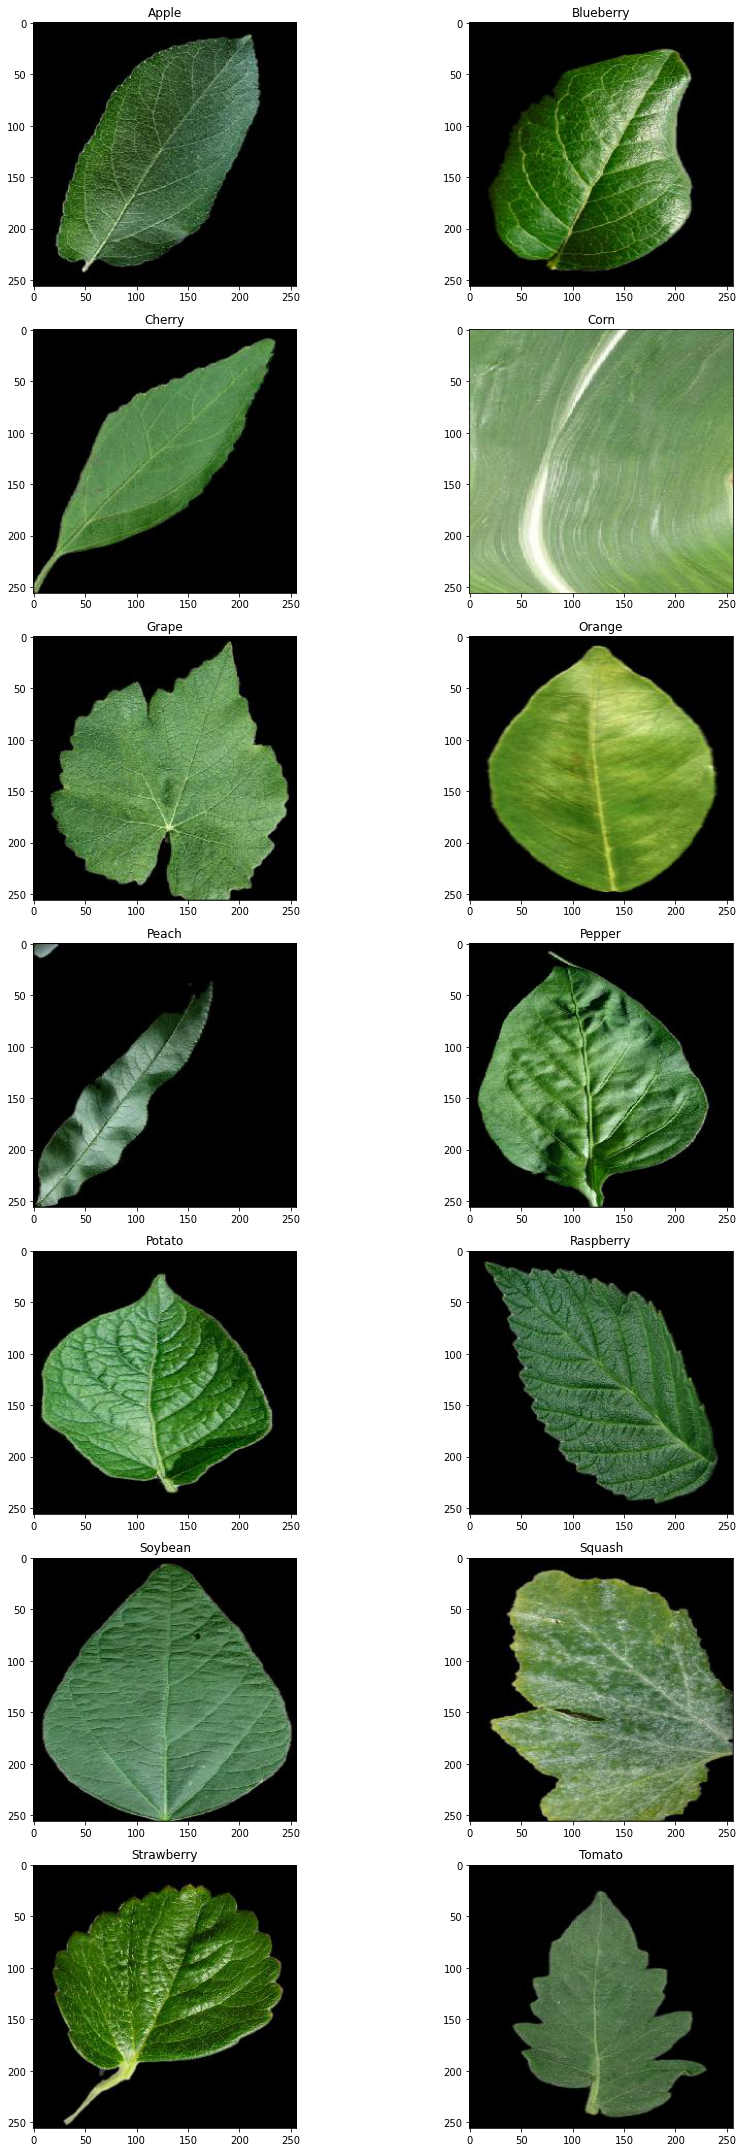

In [4]:
# Plot example images from dataset
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

Let the game begin

In [14]:
import tensorflow as tf

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = tf.keras.utils.to_categorical(range(len(labels)))
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [35]:
if not os.path.isfile("data.npy") 
  data = []
  for i, label in enumerate(labels):
    for pic in os.listdir("training/"+label):
      img = np.array(Image.open('{}/{}/{}'.format(dataset_dir, label, pic)))
      data.append((img, y[i]))
  print("Ok, saving...")
  data = np.array(data)
  with open("data.npy", "wb") as f:
  np.save(f, data)
else:
  data = np.load("data.npy")

In [6]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
n_classes = len(labels)

In [8]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have n_classes classes
predictions = Dense(n_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [9]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [10]:

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)n


SyntaxError: ignored